In [1]:
# Import initial packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sodapy import Socrata


In [2]:
# Read dataset via API from the U.S. Department of Transportation: https://datahub.transportation.gov/Automobiles/Recalls-Data/6axg-epim

client = Socrata("datahub.transportation.gov", None)




In [3]:
# Using a public dataset, so authentication is not needed. Authentication is only for private datasets. 

results = client.get("6axg-epim", limit = 30000)


In [54]:
# Converting to API data to pandas DataFrame 

df = pd.DataFrame.from_records(results)

# Dropping null numbers from the potentially affected column

df = df.dropna()

# Changing Potentially Affected column from an object to integer to allow for numeric and stastical calculations. 

df["potentially_affected"] = df["potentially_affected"].astype(int)

# Dropping zeroes from potentially affected column to ensure the instances of no vehicles impact the results.

drop_zero = df[(df["potentially_affected"] <= 0)].index

df.drop(drop_zero, inplace = True)

In [55]:
# Summary statistics for potentially affected column

df.describe()

,potentially_affected
count,2.173200e+04
mean,4.947313e+04
std,3.795256e+05
min,1.000000e+00
25%,9.300000e+01
50%,6.560000e+02
75%,6.422250e+03
max,3.200000e+07


In [57]:
# Ascertaining the number of rows and columns of the dataframe

df.shape

(21732, 12)

In [58]:
# Structure of the data including coluns, non-null values, and data types. 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21732 entries, 0 to 26699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   report_received_date  21732 non-null  object
 1   nhtsa_id              21732 non-null  object
 2   recall_link           21732 non-null  object
 3   manufacturer          21732 non-null  object
 4   subject               21732 non-null  object
 5   component             21732 non-null  object
 6   mfr_campaign_number   21732 non-null  object
 7   recall_type           21732 non-null  object
 8   potentially_affected  21732 non-null  int32 
 9   defect_summary        21732 non-null  object
 10  consequence_summary   21732 non-null  object
 11  corrective_action     21732 non-null  object
dtypes: int32(1), object(11)
memory usage: 2.1+ MB


In [59]:
# The first ten rows

df.head(10)

,report_received_date,nhtsa_id,recall_link,manufacturer,subject,component,mfr_campaign_number,recall_type,potentially_affected,defect_summary,consequence_summary,corrective_action
0,2023-02-20T00:00:00.000,23V103000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Aluminum Trailer Company (ATC),Cooktop Gas Valves May Fracture Causing Gas Leak,EQUIPMENT,23E-002,Vehicle,757,Aluminum Trailer Company (ATC) is recalling ce...,A gas leak in the presence of an ignition sour...,The remedy is currently under development. Ow...
1,2023-02-17T00:00:00.000,23V096000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Pierce Manufacturing,Aerial Ladder Basket Handrail May Detach,EQUIPMENT,74B326,Vehicle,64,Pierce Manufacturing (Pierce) is recalling cer...,A basket handrail that unexpectedly detaches f...,Dealers will install new basket handrail hinge...
2,2023-02-17T00:00:00.000,23V098000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Mercedes-Benz USA, LLC",Glass Panel May Detach,VISIBILITY,NR (Not Reported),Vehicle,1,"Mercedes-Benz USA, LLC (MBUSA) is recalling on...",A detached glass panel may become a road hazar...,Dealers will replace the front fixed glass pan...
3,2023-02-17T00:00:00.000,23V099000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"BMW of North America, LLC",Windows May Close Without Key Present/FMVSS 118,ELECTRICAL SYSTEM,NR (Not Reported),Vehicle,3193,"BMW of North Americal, LLC (BMW) is recalling ...",Unintentionally closing the windows or sunroof...,Dealers will update the software for the Elect...
4,2023-02-17T00:00:00.000,23V097000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Mercedes-Benz USA, LLC",Wiring Harness Damage May Cause Loss of ABS & ESC,ELECTRICAL SYSTEM,NR (Not Reported),Vehicle,26116,"Mercedes-Benz USA, LLC (MBUSA) is recalling ce...",A loss of anti-lock brakes or electronic stabi...,Dealers will inspect and either install a prot...
5,2023-02-16T00:00:00.000,23V091000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Jayco, Inc.",Incorrect Dinette Seat Belt Brackets/FMVSS 210,EQUIPMENT,9903584,Vehicle,20,"Jayco, Inc. (Jayco) is recalling certain 2023 ...","During a crash, loose seat belt brackets may n...","Dealers will replace the seat belt brackets, f..."
6,2023-02-16T00:00:00.000,23T001000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Continental Tire the Americas, LLC",Incorrect Tire Identification Number/FMVSS 574,TIRES,NR (Not Reported),Tire,3,"Continental Tire the Americas, LLC (Continenta...",Missing TIN information can make it difficult ...,"Dealers will replace the tires, free of charge..."
7,2023-02-16T00:00:00.000,23V090000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Nikola Corporation,Missing or Loose Brake Pedal Locking Screw,"SERVICE BRAKES, HYDRAULIC",22VDC0908,Vehicle,137,Nikola Corporation (Nikola) is recalling certa...,A detached brake pedal can cause a loss of ped...,Dealers will repair or replace the brake pedal...
8,2023-02-16T00:00:00.000,23V092000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Honda (American Honda Motor Co.),Passenger Seat Improperly Welded/FMVSS 207 & 201,SEATS,6PK,Vehicle,98,Honda (American Honda Motor Co.) is recalling ...,A seat back position that fails may not adequa...,Dealers will replace the front passenger seat ...
9,2023-02-16T00:00:00.000,23V094000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Hyundai Motor America,Seat Belt Pretensioners May Explode,SEAT BELTS,012G,Vehicle,65517,Hyundai Motor America (Hyundai) is recalling c...,An exploding seat belt pretensioner can projec...,Dealers will secure the seat belt pretensioner...


In [88]:
# The last ten rows 

df.tail(10)

,report_received_date,nhtsa_id,recall_link,manufacturer,subject,component,mfr_campaign_number,recall_type,potentially_affected,defect_summary,consequence_summary,corrective_action
22886,1982-04-21T00:00:00.000,82V037000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",FUEL:THROTTLE LINKAGES AND CONTROL:PEDAL,VEHICLE SPEED CONTROL,NR (Not Reported),Vehicle,92000,"ON THE INVOLVED VEHICLES, AN IMPROPERLY PLACED...",CONSEQUENCE OF DEFECT: THIS COULD RESULT IN U...,"DEALER WILL INSTALL, WHERE NECESSARY, A GUIDE ..."
23415,1979-10-16T00:00:00.000,79V228000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"REVCON, INCORPORATED",BRAKES:HYDRAULIC:SHOE AND DRUM SYSTEM:DRUM,"SERVICE BRAKES, HYDRAULIC",NR (Not Reported),Vehicle,208,THE BRAKE DRUMS ON THE INVOLVED VEHICLES MAY B...,"SHOULD BRAKE DRUM FAILURE OCCUR, THE STOPPING ...",DEALER WILL CORRECT BY INSTALLING NEW BRAKE DR...
25356,1973-03-26T00:00:00.000,73V072000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,SPORTSCOACH OF AMER.,LPG SYSTEMS,EQUIPMENT,NR (Not Reported),Vehicle,182,"MOTORHOMES, 25 AND 29 FOOT. POSSIBILITY THAT ...",IF THE CONDITION EXISTS THERE MAY BE UNDETECTE...,CORRECT BY INSPECTING AND HAVE SYSTEM PROPERLY...
25411,1973-01-24T00:00:00.000,73V013000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"General Motors, LLC",STRUCTURE:SHIELDS:PROTECTORS:LINES:TUBING,STRUCTURE,NR (Not Reported),Vehicle,3707064,THE POSSIBILITY EXISTS THAT DRIVING ON UNPAVED...,INCREASED STEERING EFFORT OR INTERFERENCE WITH...,INSPECT AND INSTALL SHIELD ON AFFECTED VEHICLES.
25498,1972-10-26T00:00:00.000,72V256000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",VISUAL SYSTEMS:WINDSHIELD WIPER ARM,VISIBILITY,NR (Not Reported),Vehicle,3700000,THE SET SCREW LOCKING THE WINDSHIELD WIPER ARM...,LOSS OF WIPER OPERATION WOULD IMPAIR ROAD VISI...,INSPECT AND REPLACE WITH NEW TYPE WIPER ARMS W...
25599,1972-06-29T00:00:00.000,72V160000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Ford Motor Company,INTERIOR SYSTEMS:SHOULDER BELTS,SEAT BELTS,NR (Not Reported),Vehicle,4072000,THE SHOULDER BELT PIN CONNECTOR PLASTIC SLEEVE...,IF THE SHOULDER BELT IS SEPARATED FROM THE SEA...,REPLACE THE SHOULDER BELT PIN CONNECTOR PLASTI...
25764,1971-12-29T00:00:00.000,71V235000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"General Motors, LLC",ENGINE:MOUNTS,ENGINE AND ENGINE COOLING,NR (Not Reported),Vehicle,6682084,THERE IS A POSSIBILITY THAT A SEPARATED MOTOR ...,UNEXPECTED LOSS OF THROTTLE CONTROL MAY CAUSE ...,INSPECT ENGINE MOUNTS AND INSTALL RESTRAINTS W...
26343,1969-02-28T00:00:00.000,69V030000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"General Motors, LLC",EXHAUST SYSTEM:TAIL PIPE,ENGINE AND ENGINE COOLING,NR (Not Reported),Vehicle,2570914,EXHAUST EMISSIONS (CARBON MONOXIDE) MAY ENTER ...,"UNDER THESE CONDITIONS, VEHICLE OCCUPANTS MAY ...",RESEAL NEARBY BODY JOINTS AND REPLACE THE DRAW...
26344,1969-02-28T00:00:00.000,69V031000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"General Motors, LLC",FUEL:THROTTLE LINKAGES AND CONTROL:CAM:FAST IDLE,VEHICLE SPEED CONTROL,NR (Not Reported),Vehicle,2966979,THE FAST IDLE CAM ON QUADRA-JET CARBURETORS CA...,UNEXPECTED LOSS OF THROTTLE CONTROL MAY RESULT...,INSTALL A NEW IMPROVED FAST IDLE CAM.
26699,1966-09-19T00:00:00.000,66V178000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"RENAULT, INCORPORATED",BRAKES:HYDRAULIC:LINES:HOSE:NON-METALLIC,"SERVICE BRAKES, HYDRAULIC",NR (Not Reported),Vehicle,125,POSSIBILITY THAT THE FRONT BRAKE HOSE END FITT...,IF SUCH LEAKAGE OCCURS AND IF ENOUGH BRAKE FLU...,(REPLACE FRONT BRAKE HOSES AND SEALS.)


In [61]:
# The mean, min, max and standard deviation of the potentially affected column are listed imeediately below. 

df["potentially_affected"].mean()

49473.13390392048

In [62]:
df["potentially_affected"].min()

1

In [63]:
df["potentially_affected"].max()

32000000

In [64]:
df["potentially_affected"].median()

656.0

In [65]:
df["potentially_affected"].std()

379525.5521096563

In [67]:
# Get unique manufacturer names from list if needed.

# df["manufacturer"].unique().tolist()

In [68]:
# filter out the three manufacturers with potentially affected column

ford = df[(df['manufacturer'] == 'Ford Motor Company')]
ford.info()

vw = df[(df['manufacturer'] == 'Volkswagen Group of America, Inc.')]
vw.info()

honda = df[(df['manufacturer'] == 'Honda (American Honda Motor Co.)')]
honda.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 30 to 25599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   report_received_date  974 non-null    object
 1   nhtsa_id              974 non-null    object
 2   recall_link           974 non-null    object
 3   manufacturer          974 non-null    object
 4   subject               974 non-null    object
 5   component             974 non-null    object
 6   mfr_campaign_number   974 non-null    object
 7   recall_type           974 non-null    object
 8   potentially_affected  974 non-null    int32 
 9   defect_summary        974 non-null    object
 10  consequence_summary   974 non-null    object
 11  corrective_action     974 non-null    object
dtypes: int32(1), object(11)
memory usage: 95.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 14 to 25498
Data columns (total 12 columns):
 #   Column                Non-N

In [69]:
# Assign each filtered manufacturer dataframe to a variable name.

m_vw = df[(df["manufacturer"] == "Volkswagen Group of America, Inc.")]
m_honda = df[(df["manufacturer"] == "Honda (American Honda Motor Co.)")]
m_ford = df[(df["manufacturer"] == "Ford Motor Company")]

In [70]:
# Merged dataframe containing only Volkswagen, Honda and Ford data

merged_df = [m_vw, m_honda, m_ford]

In [71]:
result = pd.concat(merged_df)

display(result)

,report_received_date,nhtsa_id,recall_link,manufacturer,subject,component,mfr_campaign_number,recall_type,potentially_affected,defect_summary,consequence_summary,corrective_action
14,2023-02-15T00:00:00.000,23V084000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",Improperly Folded Passenger Air Bag/FMVSS 208,AIR BAGS,69ET,Vehicle,1047,"Volkswagen Group of America, Inc. (Audi) is re...","In a crash, an incorrectly folded air bag can ...",Dealers will replace the front-passenger air b...
15,2023-02-15T00:00:00.000,23V086000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",Incorrect GAWR on Label/FMVSS 110 & 567,EQUIPMENT,50G5,Vehicle,12100,"Volkswagen Group of America, Inc. (Audi) is re...",An overloaded vehicle can increase the risk of...,Dealers will install an overlay label containi...
71,2023-02-01T00:00:00.000,23V040000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",High Voltage Battery Control Module May Restart,ELECTRICAL SYSTEM,97ZZ,Vehicle,20904,"Volkswagen Group of America, Inc. (Volkswagen)...",A reset or deactivation may cause a loss of dr...,Dealers will update the HV battery management ...
114,2022-12-29T00:00:00.000,22V956000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",12-Volt Battery Cable May Short Circuit,ELECTRICAL SYSTEM,97HA,Vehicle,1042,"Volkswagen Group of America, Inc. (Volkswagen)...",A short circuit may cause a loss of drive powe...,Owners are advised to park outside and away fr...
128,2022-12-21T00:00:00.000,22V945000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,"Volkswagen Group of America, Inc.",Driver's Side Air Bag Inflator May Explode,AIR BAGS,69EM,Vehicle,37558,"Volkswagen Group of America, Inc. (Volkswagen)...",An inflator explosion may result in sharp meta...,Dealers will replace the driver's side air bag...
...,...,...,...,...,...,...,...,...,...,...,...,...
21903,1987-02-19T00:00:00.000,87V017000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Ford Motor Company,VISUAL SYSTEMS:WINDSHIELD WIPER:MOTOR,VISIBILITY,NR (Not Reported),Vehicle,28000,ROAD SALT INDUCED EROSION OF THE WIPER MOTOR C...,GLASS COULD FRACTURE WHILE STATION WAGON IS BE...,APPLY SEALANT TO CONDUCTOR STRIPS AND PROTECTI...
21911,1987-02-09T00:00:00.000,87V012000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Ford Motor Company,STEERING:LINKAGES:ROD:RELAY:CONNECTING,STEERING,NR (Not Reported),Vehicle,29600,STEERING CENTERLINKS MAY BREAK AT A BEND LOCAT...,"STEERING CONTROL WOULD BE DIMINISHED, WITH RED...",REPLACE STEERING CENTERLINK.
22324,1985-04-09T00:00:00.000,85V040000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Ford Motor Company,SUSPENSION:INDEPENDENT FRONT AIR SUSPENSION SY...,SUSPENSION,NR (Not Reported),Vehicle,19200,A MALFUNCTION MAY OCCUR IN THE AIR SUSPENSION ...,A WIRE TO THE AIR SUSPENSION COMPRESSOR COULD ...,REPLACE CONTROL MODULE WITH A NEWLY DESIGNED M...
22435,1984-10-02T00:00:00.000,84V119000,{'url': 'https://www.nhtsa.gov/recalls?nhtsaId...,Ford Motor Company,FUEL:CARBURETOR:UNKNOWN TYPE,"FUEL SYSTEM, GASOLINE",NR (Not Reported),Vehicle,85000,"THE SECONDARY THROTTLE SHAFT MAY, WITH ACCUMUL...",CONSEQUENCE OF DEFECT: THIS STICKING COULD RE...,THE PRIMARY TO SECONDARY THROTTLE CLOSURE LINK...


In [72]:
# Exploring the result variable, the combined dataset.

result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 14 to 25599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   report_received_date  1761 non-null   object
 1   nhtsa_id              1761 non-null   object
 2   recall_link           1761 non-null   object
 3   manufacturer          1761 non-null   object
 4   subject               1761 non-null   object
 5   component             1761 non-null   object
 6   mfr_campaign_number   1761 non-null   object
 7   recall_type           1761 non-null   object
 8   potentially_affected  1761 non-null   int32 
 9   defect_summary        1761 non-null   object
 10  consequence_summary   1761 non-null   object
 11  corrective_action     1761 non-null   object
dtypes: int32(1), object(11)
memory usage: 172.0+ KB


In [90]:
# Potentially Affected Means - From lowest to highest: Volkswagen, Ford, Honda

print(result.groupby("manufacturer").mean())

                                   potentially_affected
manufacturer                                           
Ford Motor Company                        161243.822382
Honda (American Honda Motor Co.)          180657.397260
Volkswagen Group of America, Inc.          60137.618483


In [76]:
# Total Potentially Affected for Each Company. Ford (157,051,483) has the most potentially affected vehicles for recalls followed by Honda (65,939,950) 
# and Volkswagen (25,378,075).

print(result.groupby("manufacturer").sum())

                                   potentially_affected
manufacturer                                           
Ford Motor Company                            157051483
Honda (American Honda Motor Co.)               65939950
Volkswagen Group of America, Inc.              25378075


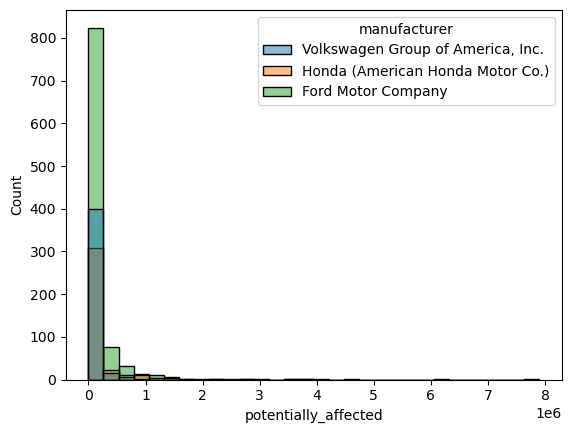

In [92]:
""" This is a Seaborn histogram for the three manufacturers. The data
contains a significant number of low number of potentially affected vehicles artificially skewing
the results. If these low numbers are removed or different manufacturers used, the histogram will become
more normalized -- instead of the right-skewed plot displayed below.

Since this is a real-world dataset, we will proceed with the ANOVA analysis with this known limitation. 

"""

sns.histplot(data = result, x = "potentially_affected", hue = "manufacturer", bins = 30)
plt.show()

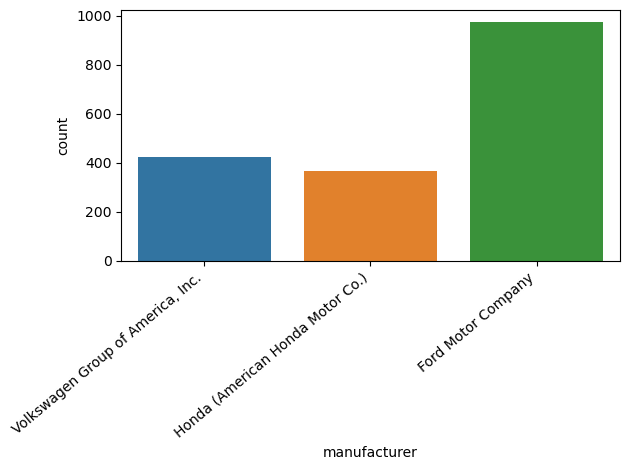

In [79]:
"""

Boxplot of the number of recalls from each manufacturer. Ford has the most, followed
by Volkswagen and then by Honda. 

"""

ax = sns.countplot(x = result["manufacturer"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()


In [82]:
# One Way ANOVA significance test was performed using the three companies and the potentially affected amounts for each.

fvalue, pvalue = stats.f_oneway(ford["potentially_affected"], honda["potentially_affected"], vw["potentially_affected"])
print(fvalue, pvalue)

9.462272076092857 8.176143765905248e-05


In [93]:
# Import statsmodels package to conduct the ANOVA test

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [96]:
# One Way ANOVA significance test was performed using the three companies and the potentially affected amounts for each.
# F-value was 9.462 and P-value was 8.176

stats.f_oneway(result["potentially_affected"][result["manufacturer"] == "Ford Motor Company"],
               result["potentially_affected"][result["manufacturer"] == "Honda (American Honda Motor Co.)"],
               result["potentially_affected"][result["manufacturer"] == "Volkswagen Group of America, Inc."])


F_onewayResult(statistic=9.462272076092857, pvalue=8.176143765905248e-05)

In [98]:
# Get an ANOVA table output to determine test significance or insignificance.
# P-value is 0.000082 which is less than 0.05 and statistically significant. 

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('potentially_affected ~ C(manufacturer)', data = result).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(manufacturer),3.732535e+12,2.0,9.462272,0.000082
Residual,3.467347e+14,1758.0,NaN,NaN


In [99]:
# We will use a Tukey HSD test to determine which pairings are different. 

import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(result["potentially_affected"], result["manufacturer"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Ford Motor Company,Honda (American Honda Motor Co.),19413.5749,0.7563,-44519.3339,83346.4836,False
Ford Motor Company,"Volkswagen Group of America, Inc.",-101106.2039,0.0003,-161817.1627,-40395.2451,True
Honda (American Honda Motor Co.),"Volkswagen Group of America, Inc.",-120519.7788,0.0004,-194983.5101,-46056.0474,True


In [ ]:
""" 

Conclusion:
There are significant differences for the Ford and Volkswagen pairing AND the Honda and Volkswagen pairing. P-values are less than 0.05 for both pairings.
The confidence interval for Ford-Volkswagen is -161817.1627 to -40,395.2451 and -194,983.5101 to -46,056.0474. 

In recent years, Volkswagen has been the number one (or very close to the number one spot) globally, but not in the US. Ford and Honda are more 
popular in the US. Given the lower number of Volkswagen sales and less popularity in the U.S. compared to Ford and Honda, there have been fewer 
vehicles affected by recalls. An interesting finding is that the test did not find Ford and Honda as statistically the same. 

Recommendation:

If you are choosing one of the more popular car mmanufacturers for a purchase, recalls may play a relatively less important role in decisions
-- averaged over the years 1966 to February 2023. 

"""